In [313]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

from utils.concentrations import pm_bernstein_lower_limit, pm_bernstein_upper_limit, betting_cs_lower_limit

import scipy.stats

%matplotlib inline

In [314]:
sns.set(
    style="whitegrid",
    font_scale=1.4,
    rc={
        "lines.linewidth": 2,
        #             "axes.facecolor": ".9",
        'figure.figsize': (12, 6)
    })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [460]:
cand_sample_sizes=[int(i) for i in np.logspace(1.3,3,100)][1:]

In [461]:
cand_sample_sizes

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 39,
 40,
 42,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 58,
 60,
 62,
 65,
 67,
 70,
 73,
 76,
 79,
 82,
 86,
 89,
 93,
 97,
 100,
 105,
 109,
 113,
 118,
 122,
 127,
 133,
 138,
 144,
 149,
 155,
 162,
 168,
 175,
 182,
 190,
 197,
 205,
 213,
 222,
 231,
 240,
 250,
 260,
 271,
 282,
 293,
 305,
 317,
 330,
 343,
 357,
 372,
 387,
 402,
 419,
 435,
 453,
 471,
 490,
 510,
 531,
 552,
 574,
 598,
 622,
 647,
 673,
 700,
 728,
 758,
 788,
 820,
 853,
 888,
 923,
 961,
 1000]

In [462]:
new_samples = [cand_sample_sizes[i+1]-cand_sample_sizes[i] for i in range(len(cand_sample_sizes)-1)]

# If used once

In [464]:
start_size = cand_sample_sizes[0]

In [465]:
global_sims = 1000

In [466]:
miscoverage_results = list()
miscoverage_results_bet = list()

In [503]:
scipy.stats.norm.ppf(0.99999999999)

6.706023143414748

In [467]:
quantile=scipy.stats.norm.ppf(0.9)

In [468]:
p_success=0.6

In [469]:
cand_sample_sizes_ind = [cur_size-1 for cur_size in cand_sample_sizes]

In [471]:
for cur_sim in range(global_sims):
    miscoverage_results+=[[]]
    miscoverage_results_bet+=[[]]
    ci_low = list()

    bern_sample = np.random.binomial(n=1,p=p_success,size=start_size)
    sample_mean = np.mean(bern_sample)
    sample_std = np.std(bern_sample, ddof=1)
    sample_len = len(bern_sample)
    left_bnd = sample_mean-z_quantile*sample_std/np.sqrt(sample_len)

    ci_low +=[left_bnd]

    for num_of_new_samples in new_samples:
        new_data = np.random.binomial(n=1,p=p_success,size=num_of_new_samples)
        bern_sample = np.concatenate([bern_sample,new_data])
        sample_mean = np.mean(bern_sample)
        sample_std = np.std(bern_sample, ddof=1)
        sample_len = len(bern_sample)
        left_bnd = sample_mean - quantile * sample_std / np.sqrt(sample_len)
        ci_low +=[left_bnd]

    cur_pass = np.zeros(shape=len(cand_sample_sizes),dtype='bool')
    
    for i in range(num_of_ints):
        if p_success<ci_low[i]:
            cur_pass[i:] = True
            break
            
    miscoverage_results[cur_sim] +=[cur_pass]
    
    bet_low_lim = np.maximum(
    0,betting_cs_lower_limit(bern_sample,
                             delta=0.1,
                             last_step_only=False))
    
    cur_pass = np.zeros(shape=len(cand_sample_sizes),dtype='bool')
    
    for i in cand_sample_sizes_ind:
        if p_success<bet_low_lim[i]:
            cur_pass[i:] = True
            break
            
    miscoverage_results_bet[cur_sim] +=[cur_pass]

In [482]:
global_sims_fixed_time = 100

In [483]:
ft_miscoverage_results = list()
ft_miscoverage_results_bet = list()

In [484]:
for cur_sim in range(global_sims_fixed_time):
    ft_miscoverage_results+=[[]]
    ft_miscoverage_results_bet+=[[]]
    ci_low = list()

#     bern_sample = np.random.binomial(n=1,p=p_success,size=start_size)
#     sample_mean = np.mean(bern_sample)
#     sample_std = np.std(bern_sample, ddof=1)
#     sample_len = len(bern_sample)
#     left_bnd = sample_mean-z_quantile*sample_std/np.sqrt(sample_len)

#     ci_low +=[left_bnd]

    for num_of_new_samples in cand_sample_sizes:
        new_data = np.random.binomial(n=1, p=p_success, size=num_of_new_samples)
        sample_mean = np.mean(new_data)
        sample_std = np.std(new_data, ddof=1)
        sample_len = len(new_data)
        left_bnd = sample_mean - quantile * sample_std / np.sqrt(sample_len)
        ci_low +=[left_bnd]

    cur_pass = np.zeros(shape=len(cand_sample_sizes),dtype='bool')
    
    for i in range(len(cand_sample_sizes)):
        if p_success<ci_low[i]:
            cur_pass[i] = True

            
    ft_miscoverage_results[cur_sim] +=[cur_pass]
    
    ci_low = list()
    
    for num_of_new_samples in cand_sample_sizes:
        new_data = np.random.binomial(n=1,p=p_success,size=num_of_new_samples)
        bet_low_lim = np.maximum(
        0,betting_cs_lower_limit(new_data,
                                 delta=0.1,
                                 last_step_only=True))
        ci_low +=[bet_low_lim]
    
    cur_pass = np.zeros(shape=len(cand_sample_sizes),dtype='bool')
    
    for i in range(len(cand_sample_sizes)):
        if p_success<ci_low[i]:
            cur_pass[i] = True
            
    ft_miscoverage_results_bet[cur_sim] +=[cur_pass]

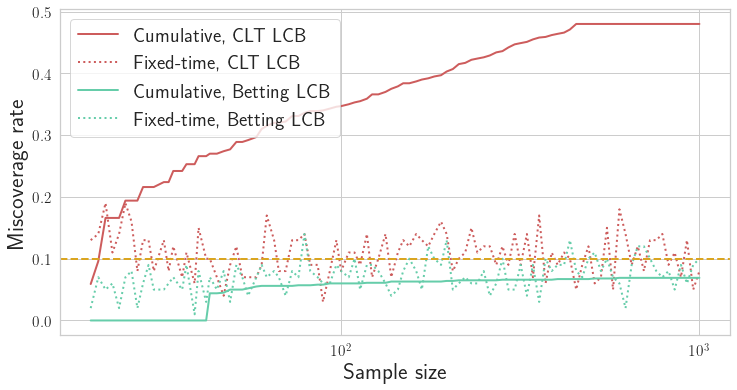

In [489]:
plt.plot(cand_sample_sizes, np.vstack(miscoverage_results).mean(axis=0), label = 'Cumulative, CLT LCB',
         color='indianred')

plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results).mean(axis=0), label = 'Fixed-time, CLT LCB',
         linestyle='dotted',
         color='indianred')

plt.plot(cand_sample_sizes, np.vstack(miscoverage_results_bet).mean(axis=0), label='Cumulative, Betting LCB',
         color='mediumaquamarine')

plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results_bet).mean(axis=0), label='Fixed-time, Betting LCB',
         linestyle='dotted',
         color='mediumaquamarine')

plt.axhline(y=0.1, c='goldenrod',
            linestyle='dashed')
plt.xscale('log')
plt.ylabel('Miscoverage rate', fontsize=23)
plt.xlabel('Sample size', fontsize=23)

plt.legend(loc=2, markerscale=1.5, prop={'size': 20})
plt.savefig('img/clt_cum_miscoverage_rate.pdf', bbox_inches='tight')

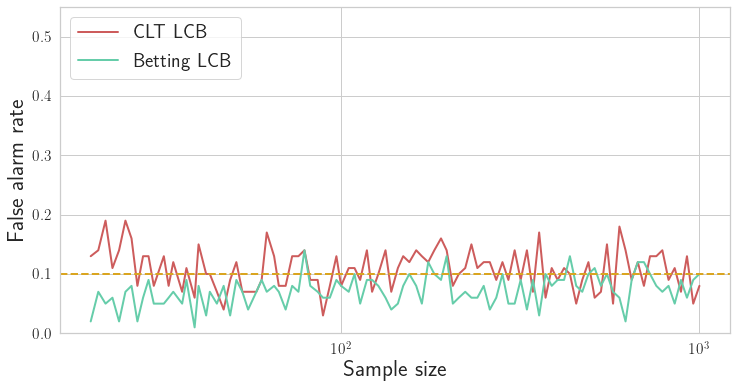

In [498]:
# plt.plot(cand_sample_sizes, np.vstack(miscoverage_results).mean(axis=0), label = 'Cumulative, CLT LCB',
#          color='indianred')

plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results).mean(axis=0), label = 'CLT LCB',
#          linestyle='dotted',
         color='indianred')

# plt.plot(cand_sample_sizes, np.vstack(miscoverage_results_bet).mean(axis=0), label='Cumulative, Betting LCB',
#          color='mediumaquamarine')

plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results_bet).mean(axis=0), label='Betting LCB',
#          linestyle='dotted',
         color='mediumaquamarine')

plt.axhline(y=0.1, c='goldenrod',
            linestyle='dashed')
plt.xscale('log')
plt.ylabel('False alarm rate', fontsize=23)
plt.xlabel('Sample size', fontsize=23)

plt.ylim([0,0.55])

plt.legend(loc=2, markerscale=1.5, prop={'size': 20})
plt.savefig('img/clt_fixed_false_alarm.pdf', bbox_inches='tight')

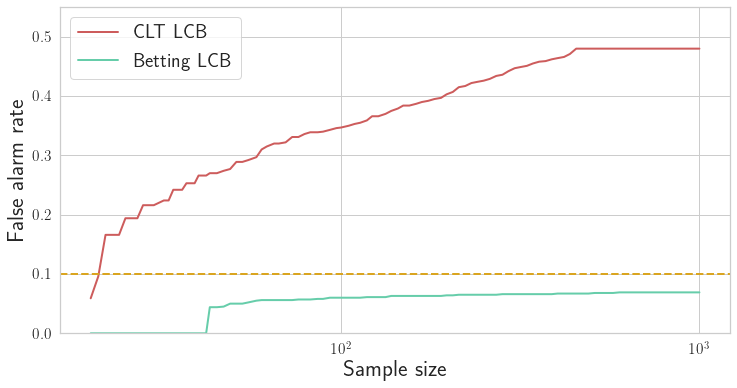

In [499]:
plt.plot(cand_sample_sizes, np.vstack(miscoverage_results).mean(axis=0), label = 'CLT LCB',
         color='indianred')

# plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results).mean(axis=0), label = 'Fixed-time, CLT LCB',
# #          linestyle='dotted',
#          color='indianred')

plt.plot(cand_sample_sizes, np.vstack(miscoverage_results_bet).mean(axis=0), label='Betting LCB',
         color='mediumaquamarine')

# plt.plot(cand_sample_sizes, np.vstack(ft_miscoverage_results_bet).mean(axis=0), label='Fixed-time, Betting LCB',
# #          linestyle='dotted',
#          color='mediumaquamarine')

plt.axhline(y=0.1, c='goldenrod',
            linestyle='dashed')
plt.xscale('log')
plt.ylabel('False alarm rate', fontsize=23)
plt.xlabel('Sample size', fontsize=23)

plt.ylim([0,0.55])

plt.legend(loc=2, markerscale=1.5, prop={'size': 20})
plt.savefig('img/clt_cum_false_alarm.pdf', bbox_inches='tight')

# Corrections for multiple testing 

In [642]:
def compute_first_k_conf_levels(delta,k):
    return delta * 1/(np.arange(k)+1)**2 * 6 / np.pi**2

def compute_first_k_conf_levels_power(delta,k):
    return delta / 2**(np.arange(k)+1)

In [748]:
compute_first_k_conf_levels_power(1,39)

array([5.00000000e-01, 2.50000000e-01, 1.25000000e-01, 6.25000000e-02,
       3.12500000e-02, 1.56250000e-02, 7.81250000e-03, 3.90625000e-03,
       1.95312500e-03, 9.76562500e-04, 4.88281250e-04, 2.44140625e-04,
       1.22070312e-04, 6.10351562e-05, 3.05175781e-05, 1.52587891e-05,
       7.62939453e-06, 3.81469727e-06, 1.90734863e-06, 9.53674316e-07,
       4.76837158e-07, 2.38418579e-07, 1.19209290e-07, 5.96046448e-08,
       2.98023224e-08, 1.49011612e-08, 7.45058060e-09, 3.72529030e-09,
       1.86264515e-09, 9.31322575e-10, 4.65661287e-10, 2.32830644e-10,
       1.16415322e-10, 5.82076609e-11, 2.91038305e-11, 1.45519152e-11,
       7.27595761e-12, 3.63797881e-12, 1.81898940e-12])

In [749]:
compute_first_k_conf_levels(0.1,39)

array([6.07927102e-02, 1.51981775e-02, 6.75474558e-03, 3.79954439e-03,
       2.43170841e-03, 1.68868639e-03, 1.24066755e-03, 9.49886097e-04,
       7.50527286e-04, 6.07927102e-04, 5.02419092e-04, 4.22171599e-04,
       3.59720179e-04, 3.10166889e-04, 2.70189823e-04, 2.37471524e-04,
       2.10355399e-04, 1.87631822e-04, 1.68400859e-04, 1.51981775e-04,
       1.37851951e-04, 1.25604773e-04, 1.14920057e-04, 1.05542900e-04,
       9.72683363e-05, 8.99300447e-05, 8.33919207e-05, 7.75417222e-05,
       7.22862190e-05, 6.75474558e-05, 6.32598441e-05, 5.93678810e-05,
       5.58243436e-05, 5.25888496e-05, 4.96267022e-05, 4.69079554e-05,
       4.44066546e-05, 4.21002148e-05, 3.99689087e-05])

In [773]:
global_sims = 100
clt_cs = list()
clt_cs_power = list()
betting_cs = list()


num_of_samples = 25

In [774]:
cand_sample_sizes= np.arange(25,1000,num_of_samples)

In [775]:
cand_sample_sizes

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650,
       675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975])

In [776]:
len(cand_sample_sizes)

39

In [777]:
z_quantiles = compute_first_k_conf_levels(0.1, len(cand_sample_sizes))
z_quantiles_power = compute_first_k_conf_levels_power(0.1, len(cand_sample_sizes))

In [778]:
p_success=0.6

In [779]:
for cur_sim in range(global_sims):
    clt_cs +=[[]]
    clt_cs_power +=[[]]
    betting_cs+=[[]]
    
    bern_sample = np.random.binomial(n=1,p=p_success,size=20)
    
    sample_mean = np.mean(bern_sample)
    sample_std = np.std(bern_sample, ddof=1)
    sample_len = len(bern_sample)
    
    cur_quantile=scipy.stats.norm.ppf(1-z_quantiles[0])
    
    clt_bnd = sample_mean-cur_quantile*sample_std/np.sqrt(sample_len)
    
    clt_cs[cur_sim] +=[clt_bnd]
    
    cur_quantile=scipy.stats.norm.ppf(1-z_quantiles_power[0])
    
    clt_bnd = sample_mean-cur_quantile*sample_std/np.sqrt(sample_len)
    
    clt_cs_power[cur_sim] +=[clt_bnd]
    
    for cur_ind, num_of_new_samples in enumerate(cand_sample_sizes[1:]):
        new_data = np.random.binomial(n=1,p=p_success,size=num_of_samples)
        bern_sample = np.concatenate([bern_sample,new_data])
        sample_mean = np.mean(bern_sample)
        sample_std = np.std(bern_sample, ddof=1)
        sample_len = len(bern_sample)
        cur_quantile=scipy.stats.norm.ppf(1-z_quantiles[cur_ind+1])
        clt_bnd = sample_mean - cur_quantile * sample_std / np.sqrt(sample_len)
        clt_cs[cur_sim] +=[clt_bnd]
        
        cur_quantile=scipy.stats.norm.ppf(1-z_quantiles_power[cur_ind+1])
    
        clt_bnd = sample_mean-cur_quantile*sample_std/np.sqrt(sample_len)

        clt_cs_power[cur_sim] +=[clt_bnd]

        
    bet_low_lim = np.maximum(
    0,betting_cs_lower_limit(bern_sample,
                             delta=0.1,
                             last_step_only=False))
    
    betting_cs[cur_sim]+=[bet_low_lim]
    

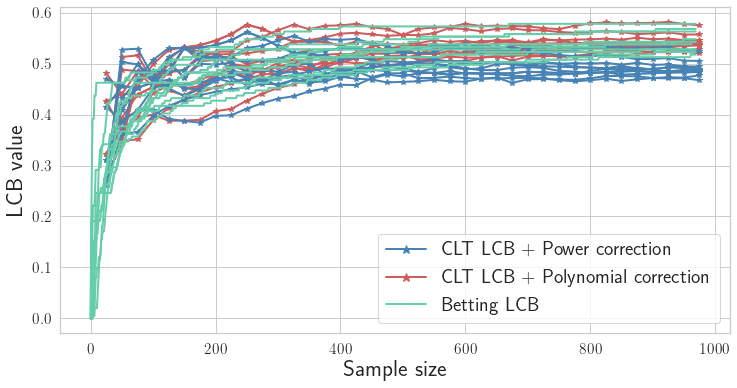

In [780]:
plt.plot(cand_sample_sizes,clt_cs_power[0], marker='*', c='steelblue', label='CLT LCB + Power correction')

plt.plot(cand_sample_sizes,clt_cs[0], marker='*', c='indianred', label='CLT LCB + Polynomial correction')

plt.plot(betting_cs[0][0], c='mediumaquamarine', label='Betting LCB')

for cur_bnd in clt_cs[:10]:
    plt.plot(cand_sample_sizes,cur_bnd, marker='*', c='indianred')
    
for cur_bnd in clt_cs_power[:10]:
    plt.plot(cand_sample_sizes,cur_bnd, marker='*', c='steelblue')
    
for cur_bnd in betting_cs[:10]:
    plt.plot(cur_bnd[0], c='mediumaquamarine')
    
plt.ylabel('LCB value', fontsize=23)
plt.xlabel('Sample size', fontsize=23)


plt.legend(loc=4, markerscale=1.5, prop={'size': 20})

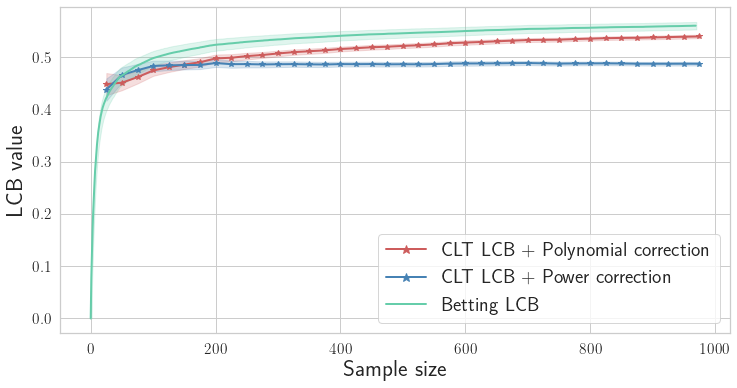

In [782]:
plt.plot(cand_sample_sizes,
         np.mean(clt_cs, axis=0),
         marker='*',
         c='indianred',
         label='CLT LCB + Polynomial correction')

plt.fill_between(
    cand_sample_sizes,
    y1=np.mean(clt_cs, axis=0) - 2 * np.std(clt_cs, axis=0) / np.sqrt(global_sims),
    y2=np.mean(clt_cs, axis=0) + 2 * np.std(clt_cs, axis=0) / np.sqrt(global_sims),
    alpha=0.2,
    color='indianred')

plt.plot(cand_sample_sizes,
         np.mean(clt_cs_power, axis=0),
         marker='*',
         c='steelblue',
         label='CLT LCB + Power correction')

plt.fill_between(
    cand_sample_sizes,
    y1=np.mean(clt_cs_power, axis=0) - 2 * np.std(clt_cs_power, axis=0) / np.sqrt(global_sims),
    y2=np.mean(clt_cs_power, axis=0) + 2 * np.std(clt_cs_power, axis=0) / np.sqrt(global_sims),
    alpha=0.2,
    color='steelblue')

plt.plot(np.mean(betting_cs, axis=0).ravel(),
         c='mediumaquamarine',
         label='Betting LCB')

plt.fill_between(
    np.arange(len(betting_cs[0][0]))+1,
    y1=np.mean(betting_cs, axis=0).ravel() - 2 * np.std(betting_cs, axis=0).ravel() / np.sqrt(global_sims),
    y2=np.mean(betting_cs, axis=0).ravel() + 2 * np.std(betting_cs, axis=0).ravel() / np.sqrt(global_sims),
    alpha=0.2,
    color='mediumaquamarine')

# for cur_bnd in clt_cs:
#     plt.plot(cand_sample_sizes,cur_bnd, marker='*', c='indianred')

# for cur_bnd in betting_cs:
#     plt.plot(cur_bnd[0], c='mediumaquamarine')

plt.ylabel('LCB value', fontsize=23)
plt.xlabel('Sample size', fontsize=23)

plt.legend(loc=4, markerscale=1.5, prop={'size': 20})

plt.savefig('img/clt_correction.pdf', bbox_inches='tight')

In [783]:
compute_first_k_conf_levels(0.1,1000)

array([6.07927102e-02, 1.51981775e-02, 6.75474558e-03, 3.79954439e-03,
       2.43170841e-03, 1.68868639e-03, 1.24066755e-03, 9.49886097e-04,
       7.50527286e-04, 6.07927102e-04, 5.02419092e-04, 4.22171599e-04,
       3.59720179e-04, 3.10166889e-04, 2.70189823e-04, 2.37471524e-04,
       2.10355399e-04, 1.87631822e-04, 1.68400859e-04, 1.51981775e-04,
       1.37851951e-04, 1.25604773e-04, 1.14920057e-04, 1.05542900e-04,
       9.72683363e-05, 8.99300447e-05, 8.33919207e-05, 7.75417222e-05,
       7.22862190e-05, 6.75474558e-05, 6.32598441e-05, 5.93678810e-05,
       5.58243436e-05, 5.25888496e-05, 4.96267022e-05, 4.69079554e-05,
       4.44066546e-05, 4.21002148e-05, 3.99689087e-05, 3.79954439e-05,
       3.61646105e-05, 3.44629876e-05, 3.28786967e-05, 3.14011933e-05,
       3.00210914e-05, 2.87300143e-05, 2.75204664e-05, 2.63857249e-05,
       2.53197460e-05, 2.43170841e-05, 2.33728221e-05, 2.24825112e-05,
       2.16421183e-05, 2.08479802e-05, 2.00967637e-05, 1.93854305e-05,
      

In [785]:
global_sims = 100
clt_cs = list()
clt_cs_power = list()
betting_cs = list()


num_of_samples = 1

In [786]:
cand_sample_sizes= np.arange(25,1000,num_of_samples)

In [788]:
len(cand_sample_sizes)

975

In [790]:
z_quantiles = compute_first_k_conf_levels(0.1, len(cand_sample_sizes))

In [791]:
for cur_sim in range(global_sims):
    clt_cs +=[[]]
    betting_cs+=[[]]
    
    bern_sample = np.random.binomial(n=1,p=p_success,size=25)
    
    sample_mean = np.mean(bern_sample)
    sample_std = np.std(bern_sample, ddof=1)
    sample_len = len(bern_sample)
    
    cur_quantile=scipy.stats.norm.ppf(1-z_quantiles[0])
    
    clt_bnd = sample_mean-cur_quantile*sample_std/np.sqrt(sample_len)
    
    clt_cs[cur_sim] +=[clt_bnd]
    
    for cur_ind, num_of_new_samples in enumerate(cand_sample_sizes[1:]):
        new_data = np.random.binomial(n=1,p=p_success,size=1)
        bern_sample = np.concatenate([bern_sample,new_data])
        sample_mean = np.mean(bern_sample)
        sample_std = np.std(bern_sample, ddof=1)
        sample_len = len(bern_sample)
        cur_quantile=scipy.stats.norm.ppf(1-z_quantiles[cur_ind+1])
        clt_bnd = sample_mean - cur_quantile * sample_std / np.sqrt(sample_len)
        clt_cs[cur_sim] +=[clt_bnd]

        
    bet_low_lim = np.maximum(
    0,betting_cs_lower_limit(bern_sample,
                             delta=0.1,
                             last_step_only=False))
    
    betting_cs[cur_sim]+=[bet_low_lim]
    

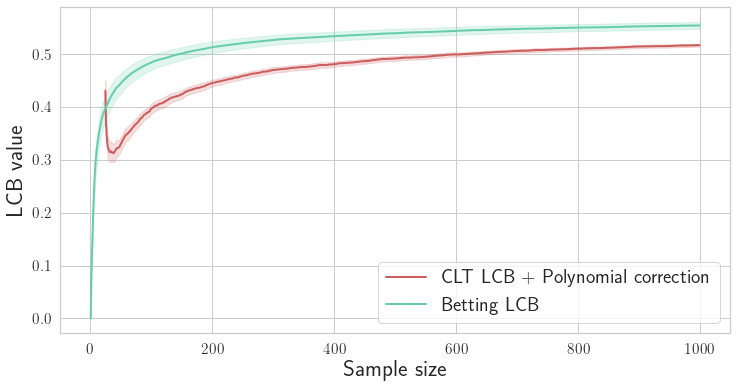

In [798]:
plt.plot(cand_sample_sizes,
         np.mean(clt_cs, axis=0),
#          marker='*',
         c='indianred',
         label='CLT LCB + Polynomial correction')

plt.fill_between(
    cand_sample_sizes,
    y1=np.mean(clt_cs, axis=0) - 2 * np.std(clt_cs, axis=0) / np.sqrt(global_sims),
    y2=np.mean(clt_cs, axis=0) + 2 * np.std(clt_cs, axis=0) / np.sqrt(global_sims),
    alpha=0.2,
    color='indianred')

plt.plot(np.arange(len(betting_cs[0][0]))+1,
    np.mean(betting_cs, axis=0).ravel(),
         c='mediumaquamarine',
         label='Betting LCB')

plt.fill_between(
    np.arange(len(betting_cs[0][0]))+1,
    y1=np.mean(betting_cs, axis=0).ravel() - 2 * np.std(betting_cs, axis=0).ravel() / np.sqrt(global_sims),
    y2=np.mean(betting_cs, axis=0).ravel() + 2 * np.std(betting_cs, axis=0).ravel() / np.sqrt(global_sims),
    alpha=0.2,
    color='mediumaquamarine')

# for cur_bnd in clt_cs:
#     plt.plot(cand_sample_sizes,cur_bnd, marker='*', c='indianred')

# for cur_bnd in betting_cs:
#     plt.plot(cur_bnd[0], c='mediumaquamarine')

plt.ylabel('LCB value', fontsize=23)
plt.xlabel('Sample size', fontsize=23)

plt.legend(loc=4, markerscale=1.5, prop={'size': 20})

plt.savefig('img/clt_correction_every_time.pdf', bbox_inches='tight')